En este trabajo recorreremos y analizaremos un dataset sobre las recaudaciones de las películas de Hollywood desde 1990 al 2020.	

Concretamente, tendremos información sobre 3243 películas estrenadas en el período de tiempo mencionado, donde cada película está presentada con su año de estreno. El dataset dispone información sobre la recaudación doméstica, internacional y total de cada película (ajustado por inflación, en dolares), así como datos sobre su presupuesto informado, datos sobre director, actores principales, clasificación, distribuidor, duración y los géneros en los cuáles se clasifica cada película (ejemplo: terror, acción, comedia, etc).

Este dataset fue seleccionado para analizar porque dispone de una gran cantidad de datos. Anteriormente se analizo trabajar con un dataset sobre las películas del Universo Cinematográfico de Mavel y sobre las canciones más stremeadas de Spotify del año pasado, pero ninguno de esos dataset cumplia con la cantidad de data suficiente para analizar.

Hipótesis


Sobre este dataset se pudo analizar la historia del cine de Hollywood en una etapa de masificación del mismo donde se desarrollan varias tecnologias que permiten más accesibilidad a las películas, así como una mayor mercantilización de las mismas que ha permitido un crecimiento exponencial en las ganancias.
Realizamos varias hipotesis a fin de llegar a las conclusiones de cada pregunta que se nos presentó al analizar el dataset:

¿Qué variación ha tenido la recaudación total del cine según pasan los años y las décadas?
La recaudación va en crecida en esos 30 años que representan el final del siglo XX y principios del XXI. Esto nos ayuda a analizar a qué se debe el crecimiento en la audiencia conforme va pasando el tiempo y tener ideas de cómo se puede sostener en el tiempo o hacer que crezca.

¿Cómo han cambiado los gustos durante los años expuestos?¿Qué diferencias se encuentran entre cada década?
Aquí podemos deducir cambios en las preferencias de toda la sociedad según el arte masivo que están consumiendo, así como las mejoras narrativas en cada género. Esto se puede  analizar graficando el éxito económico de cada género según el tiempo, podemos tomar muestras sobre un año significativo de cada década (como son 1996, 2006, 2016, ya que es la mitad de cada década y podemos inferir que la define), también podemos hacer este análisis graficando cuál la película más exitosa de cada año y como se diferencia con la recaudación del resto.

Estos datos pueden ser significativos para que un estudio cinemátografico, distribuidora o cine, puedan analizar el apoyo y el nivel de inversión que puede recibir un proyecto audiovisual  a futuro. Así como predecir expectativas sobre las elecciones del público a la hora de consumir una película.



In [1]:
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import numpy as np

In [2]:
mpl.style.use('classic')

In [3]:
url = 'https://raw.githubusercontent.com/LuzEva/DataScience1/main/Mojo_budget_update.csv'
df = pd.read_csv(url)
df.head()

,movie_id,title,year,trivia,mpaa,release_date,run_time,distributor,director,writer,...,main_actor_4,budget,domestic,international,worldwide,genre_1,genre_2,genre_3,genre_4,html
0,tt0099088,Back to the Future Part III,1990,"Stranded in 1955, Marty McFly learns about the...",NaN,May 25,1 hr 58 min,Universal Pictures,Robert Zemeckis,Robert Zemeckis,...,Thomas F. Wilson,40000000.0,88277583.0,157866667.0,246144250.0,Adventure,Comedy,Sci-Fi,Western,https://www.boxofficemojo.com/title/tt0099088/...
1,tt0099165,The Bonfire of the Vanities,1990,"After his mistress runs over a young teen, a W...",R,December 22,2 hr 5 min,Warner Bros.,Brian De Palma,Michael Cristofer,...,Kim Cattrall,47000000.0,15691192.0,NaN,15691192.0,Comedy,Drama,Romance,NaN,https://www.boxofficemojo.com/title/tt0099165/...
2,tt0099348,Dances with Wolves,1990,"Lieutenant John Dunbar, assigned to a remote w...",NaN,November 9,3 hr 1 min,Orion Pictures,Kevin Costner,Michael Blake,...,Rodney A. Grant,22000000.0,184208848.0,240000000.0,424208848.0,Adventure,Drama,Western,NaN,https://www.boxofficemojo.com/title/tt0099348/...
3,tt0099422,Dick Tracy,1990,The comic strip detective finds his life vastl...,NaN,June 15,1 hr 45 min,Walt Disney Studios Motion Pictures,Warren Beatty,Chester Gould,...,Charlie Korsmo,47000000.0,103738726.0,59000000.0,162738726.0,Action,Comedy,Crime,Music,https://www.boxofficemojo.com/title/tt0099422/...
4,tt0099423,Die Hard 2,1990,John McClane attempts to avert disaster as rog...,NaN,July 6,2 hr 4 min,Twentieth Century Fox,Renny Harlin,Walter Wager,...,Reginald VelJohnson,70000000.0,117540947.0,122706486.0,240247433.0,Action,Thriller,NaN,NaN,https://www.boxofficemojo.com/title/tt0099423/...


In [4]:
df.shape


(3243, 26)

In [5]:
df=df.drop(['movie_id', 'trivia', 'release_date', 'writer', 'main_actor_2', 'main_actor_3', 'main_actor_4', 'genre_4', 'html', 'composer', 'cinematographer'], axis=1)
df.head()

,title,year,mpaa,run_time,distributor,director,producer,main_actor_1,budget,domestic,international,worldwide,genre_1,genre_2,genre_3
0,Back to the Future Part III,1990,NaN,1 hr 58 min,Universal Pictures,Robert Zemeckis,Neil Canton,Michael J. Fox,40000000.0,88277583.0,157866667.0,246144250.0,Adventure,Comedy,Sci-Fi
1,The Bonfire of the Vanities,1990,R,2 hr 5 min,Warner Bros.,Brian De Palma,Brian De Palma,Tom Hanks,47000000.0,15691192.0,NaN,15691192.0,Comedy,Drama,Romance
2,Dances with Wolves,1990,NaN,3 hr 1 min,Orion Pictures,Kevin Costner,Kevin Costner,Kevin Costner,22000000.0,184208848.0,240000000.0,424208848.0,Adventure,Drama,Western
3,Dick Tracy,1990,NaN,1 hr 45 min,Walt Disney Studios Motion Pictures,Warren Beatty,Warren Beatty,Warren Beatty,47000000.0,103738726.0,59000000.0,162738726.0,Action,Comedy,Crime
4,Die Hard 2,1990,NaN,2 hr 4 min,Twentieth Century Fox,Renny Harlin,Charles Gordon,Bruce Willis,70000000.0,117540947.0,122706486.0,240247433.0,Action,Thriller,NaN


Se eliminan 11 columnas con datos irrelevantes para analizar como el Id asignado a cada producción, la columna "trivia" que muestra una breve sinopsis de cada película, la fecha de lanzamiento, guionista, actores secundarios, genero 4, compositores musicales, directores de fotografías y un html que es un link a box office mojo que es la web de donde se extraen todos los datos presentados en el dataset.
Sólo nos quedaremos con 15 columnas que pueden presentar datos relevantes.

In [6]:
df.shape 

(3243, 15)

In [7]:
df.describe()

,year,budget,domestic,international,worldwide
count,3243.000000,3.243000e+03,3.224000e+03,2.833000e+03,3.236000e+03
mean,2006.664200,4.621878e+07,6.149192e+07,8.915078e+07,1.393122e+08
std,7.203684,4.708696e+07,8.036629e+07,1.497687e+08,2.162107e+08
min,1990.000000,2.200000e+02,3.000000e+01,8.950000e+02,3.000000e+01
25%,2001.000000,1.400000e+07,1.300557e+07,8.200000e+06,1.893990e+07
50%,2007.000000,3.000000e+07,3.539594e+07,3.628046e+07,6.225159e+07
75%,2012.000000,6.100000e+07,7.728525e+07,1.032500e+08,1.697622e+08
max,2020.000000,3.560000e+08,9.366622e+08,2.029931e+09,2.797801e+09


In [8]:
df.isnull()

,title,year,mpaa,run_time,distributor,director,producer,main_actor_1,budget,domestic,international,worldwide,genre_1,genre_2,genre_3
0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3239,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3240,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3241,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [9]:
df_agrupado_recaudacion = df.groupby('year', as_index=False)['worldwide'].sum()
df_agrupado_recaudacion

,year,worldwide
0,1990,3.580045e+09
1,1991,3.477461e+09
2,1992,3.301975e+09
3,1993,3.291480e+09
4,1994,6.023429e+09
5,1995,2.752870e+09
6,1996,4.653339e+09
7,1997,8.549670e+09
8,1998,7.111854e+09
9,1999,1.339697e+10


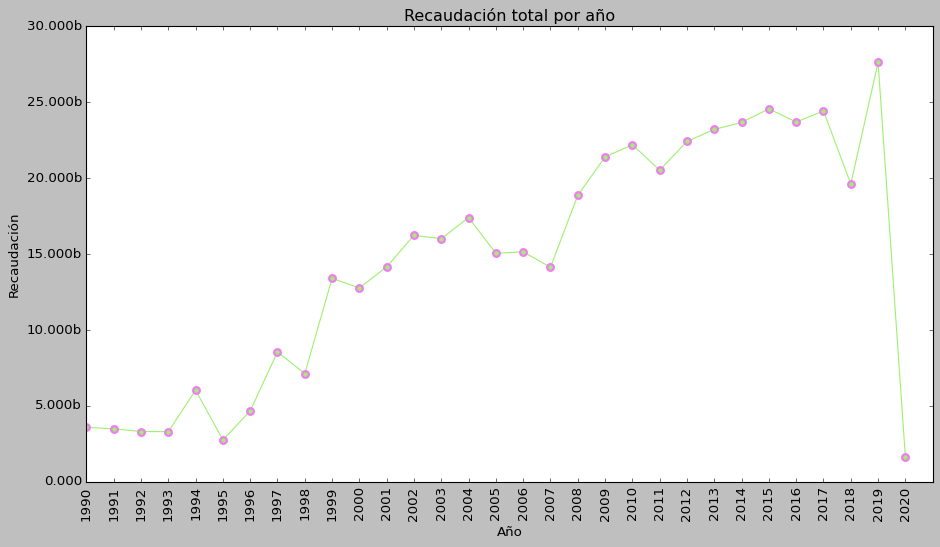

In [10]:
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(df_agrupado_recaudacion['year'], df_agrupado_recaudacion['worldwide'],marker='o', markeredgecolor='#EE7DF0',markeredgewidth=2, linestyle='-', color='#9EF06E')
plt.xticks(ticks=df_agrupado_recaudacion['year'], labels=[str(año) for año in df_agrupado_recaudacion['year']], rotation=90)
def format_y_ticks(value, tick_position):
    if value >= 1e12:
        return f'{value * 1e-12:.3f}t'  # Trillones
    elif value >= 1e9:
        return f'{value * 1e-9:.3f}b'  # Billones
    elif value >= 1e6:
        return f'{value * 1e-6:.3f}M'  # Millones
    elif value >= 1e3:
        return f'{value * 1e-3:.3f}k'  # Miles
    else:
        return f'{value:.3f}'
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_ticks))
ax.set_xlabel('Año')
ax.set_ylabel('Recaudación')
ax.set_title('Recaudación total por año')
plt.tight_layout()
plt.xlim(1990, 2021) #Se agrega un año más al gráfico para visualizar mejor los datos del 2020
plt.show()

En este gráfico, podemos tener una noción de como va creciendo la recaudación de las películas a traves de los años. Se puede notar que al final de cada década hay un aumento en la recaudación.
Ya podemos concluir que los datos del 2020 no van a tener una relevancia en el análisis ya que corresponde al año en que comienza la pandemia.
Cabe destacar que el año anterior a la pandemia fue el que más se ha recaudado. Cuál fue la película más taquillera del 2019? Es esa película la más taquillera dentro de estás decadas?

In [11]:
maxima_recaudación = df['worldwide'].idxmax()
pelicula_maxima_recaudacion = df.loc[maxima_recaudación]
print("La película con Mayor Recaudación de los últimos 30 años es:")
pelicula_maxima_recaudacion

La película con Mayor Recaudación de los últimos 30 años es:


title                              Avengers: Endgame
year                                            2019
mpaa                                           PG-13
run_time                                  3 hr 1 min
distributor      Walt Disney Studios Motion Pictures
director                               Anthony Russo
producer                                 Kevin Feige
main_actor_1                       Robert Downey Jr.
budget                                   356000000.0
domestic                                 858373000.0
international                           1939427564.0
worldwide                               2797800564.0
genre_1                                       Action
genre_2                                    Adventure
genre_3                                        Drama
Name: 3019, dtype: object

Efectivamente la película más taquillera del período analizado coincide con el año de mayor recaudación (2019)

Ahora, vamos a analizar a través de un gráfico de líneas similar al anterior, la relación entre el presupuesto y la recaudación para poder visualizar la rentabilidad

In [12]:
df_agrupado_recaudacion_y_presupuesto = df.groupby('year').agg({'budget': 'sum', 'worldwide': 'sum'}).reset_index()
df_agrupado_recaudacion_y_presupuesto

,year,budget,worldwide
0,1990,5.067530e+08,3.580045e+09
1,1991,1.051400e+09,3.477461e+09
2,1992,8.835000e+08,3.301975e+09
3,1993,8.125000e+08,3.291480e+09
4,1994,1.698127e+09,6.023429e+09
5,1995,1.403238e+09,2.752870e+09
6,1996,1.274400e+09,4.653339e+09
7,1997,2.801350e+09,8.549670e+09
8,1998,3.578006e+09,7.111854e+09
9,1999,6.798810e+09,1.339697e+10


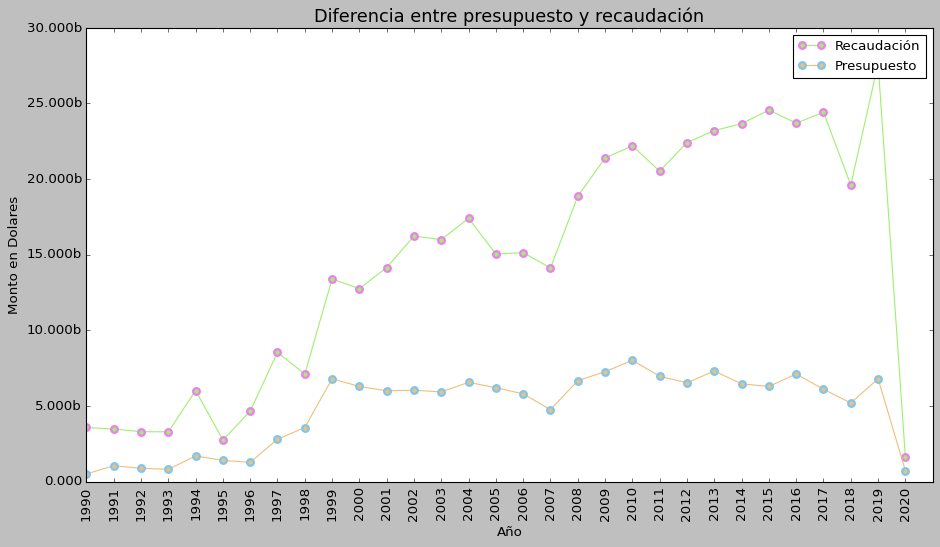

In [13]:
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(df_agrupado_recaudacion_y_presupuesto['year'], df_agrupado_recaudacion_y_presupuesto['worldwide'],marker='o', markeredgecolor='#EE7DF0',markeredgewidth=2, linestyle='-', color='#9EF06E', label='Recaudación')
plt.plot(df_agrupado_recaudacion_y_presupuesto['year'], df_agrupado_recaudacion_y_presupuesto['budget'],marker='o', markeredgecolor='#7DC6F0',markeredgewidth=2, linestyle='-', color='#F0BF7A', label='Presupuesto')
plt.xticks(ticks=df_agrupado_recaudacion['year'], labels=[str(año) for año in df_agrupado_recaudacion['year']], rotation=90)
def format_y_ticks(value, tick_position):
    if value >= 1e12:
        return f'{value * 1e-12:.3f}t'  # Trillones
    elif value >= 1e9:
        return f'{value * 1e-9:.3f}b'  # Billones
    elif value >= 1e6:
        return f'{value * 1e-6:.3f}M'  # Millones
    elif value >= 1e3:
        return f'{value * 1e-3:.3f}k'  # Miles
    else:
        return f'{value:.3f}'
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_ticks))
ax.set_xlabel('Año')
ax.set_ylabel('Monto en Dolares')
ax.set_title('Diferencia entre presupuesto y recaudación',fontsize=16)
plt.legend(title_fontsize='13', fontsize='12')
plt.tight_layout()
plt.xlim(1990, 2021)
plt.show()

Con lo analizado, podemos deducir que durante la década del 90 es la que genero menos rentabilidad ya que se observan cercanas las variables. Las décadas restantes se puede observar una relación más constante, siento la década con mayor rentabilidad del 2009-2019.
Con esto, podemos deducir que la decada de los 2010 fueron los más rentables para la industria.

Pasamos a crear un gráfico de barras donde se cuente la popularidad de los géneros según el año

In [14]:
df_agrupado = df.groupby(['year', 'genre_1']).size().reset_index(name='cantidad')
generos_mas_populares = df_agrupado.groupby('genre_1')['cantidad'].sum().nlargest(3).index
df_generos_mas_populares = df_agrupado[df_agrupado['genre_1'].isin(generos_mas_populares)]
df_generos_mas_populares


,year,genre_1,cantidad
0,1990,Action,6
2,1990,Comedy,7
5,1990,Drama,2
6,1991,Action,13
9,1991,Comedy,20
...,...,...,...
254,2019,Comedy,20
256,2019,Drama,15
258,2020,Action,5
260,2020,Comedy,1


In [15]:
df_pivot = df_generos_mas_populares.pivot_table(index='year', columns='genre_1', values='cantidad', fill_value=0)
df_pivot


genre_1,Action,Comedy,Drama
year,,,
1990,6.0,7.0,2.0
1991,13.0,20.0,3.0
1992,7.0,9.0,4.0
1993,9.0,7.0,4.0
1994,14.0,19.0,9.0
1995,15.0,9.0,6.0
1996,10.0,16.0,3.0
1997,20.0,19.0,11.0
1998,18.0,30.0,10.0


In [16]:
colores_genero = { #Definimos los colores para cada género
    'Action': '#7DC6F0',   # Turquesa
    'Comedy': '#F0BF7A',  # Naranja
    'Drama': '#EE7DF0'     # Rosa
}

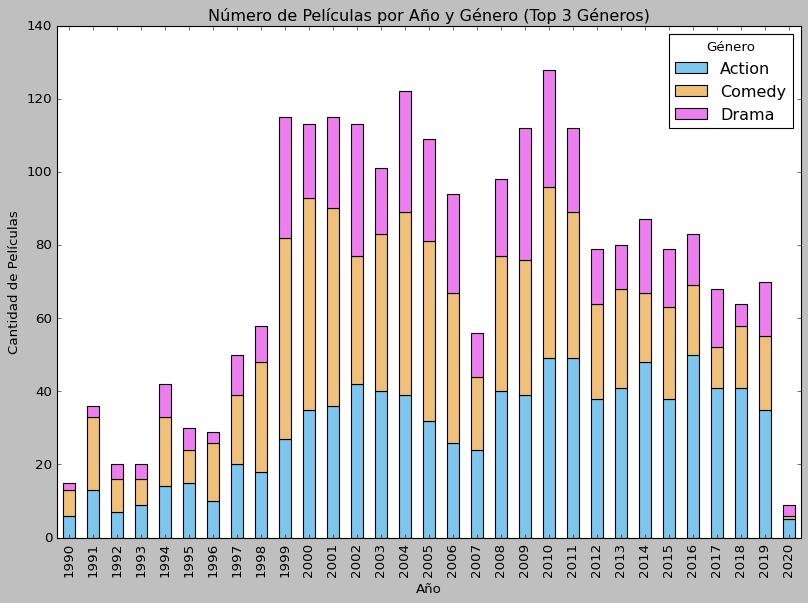

In [17]:
plt.figure(figsize=(12, 8))
df_pivot.plot(kind='bar', stacked=True, color=[colores_genero[col] for col in df_pivot.columns], ax=plt.gca())
plt.title('Número de Películas por Año y Género (Top 3 Géneros)')
plt.xlabel('Año')
plt.ylabel('Cantidad de Películas')
plt.legend(title='Género')
plt.show()


Con este gráfico podemos visualizar que el 2010 fue el año que más películas se han realizado en Hollywood de los géneros más populares siendo Acción el género más popular. La diferencia la vemos en la década de los 2000, donde Comedia fue el género más popular.
La fluctuación de los géneros de prefencia según la década, lo podemos tomar de un muestreo de la película más taquillera según el año. Vamos a verlo en datos:

In [18]:
peliucla_por_año=df.loc[df.groupby('year')['worldwide'].idxmax()][['year', 'title', 'worldwide', 'genre_1']].reset_index(drop=True)
peliucla_por_año

,year,title,worldwide,genre_1
0,1990,Ghost,5.058095e+08,Drama
1,1991,Terminator 2: Judgment Day,5.208848e+08,Action
2,1992,Aladdin,5.040502e+08,Adventure
3,1993,Jurassic Park,1.032021e+09,Action
4,1994,The Lion King,9.685118e+08,Adventure
5,1995,Die Hard with a Vengeance,3.662365e+08,Action
6,1996,Independence Day,8.174009e+08,Action
7,1997,Titanic,2.194440e+09,Drama
8,1998,Armageddon,5.537098e+08,Action
9,1999,Star Wars: Episode I - The Phantom Menace,1.027083e+09,Action


Ahora vamos a analizar en un piechart la cantidad de películas de cada género principal para poder tener más clara la información de la proporción

In [19]:
cant_por_genero = df.groupby('genre_1').size().reset_index(name='cantidad') #A fin de tener más prolijidad en el gráfico, nos limitaremos a los 7 más populares
cant_por_genero = cant_por_genero.sort_values(by='cantidad', ascending=False)
cant_por_genero=cant_por_genero.head(7)
cant_por_genero

,genre_1,cantidad
0,Action,927
4,Comedy,867
7,Drama,513
1,Adventure,313
5,Crime,204
3,Biography,181
10,Horror,162


In [20]:
colores_top_7 = {
    'Action': '#7DC6F0',   # Turquesa
    'Comedy': '#F0BF7A',  # Naranja
    'Drama': '#EE7DF0',     # Rosa
    'Adventure' : '#9EF06E', #Verde
    'Crime' : '#8E9294', #Gris
    'Biography' : '#6E174E', #Bordo
    'Horror' : '#A3A7FB' #lavanda
}

colores_manual = [colores_top_7[genero] for genero in cant_por_genero['genre_1']]

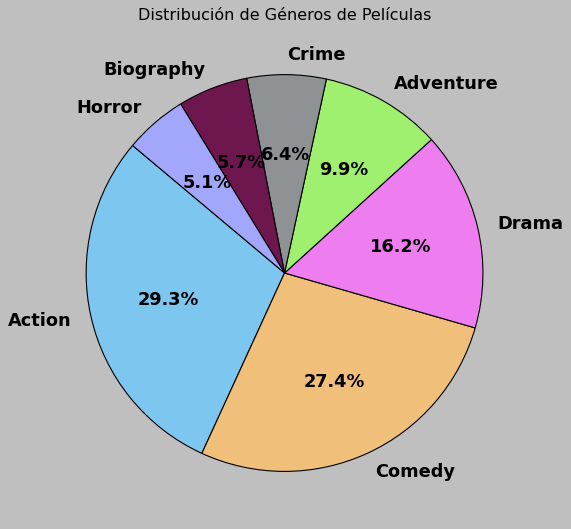

In [21]:
plt.figure(figsize=(8, 8))                                #A fin de tener más prolijidad en el grafico, se eligiran los 7 más populares
plt.pie(
    cant_por_genero['cantidad'], 
    labels=cant_por_genero['genre_1'],
    colors=colores_manual,
    autopct='%1.1f%%', 
    startangle=140,
  textprops={'fontsize': 16, 'fontweight': 'bold', 'color': 'black'})
plt.title('Distribución de Géneros de Películas')
plt.show()
    


Con este piechart, confirmamos los datos de las columnas y podemos tener una tendencia rápida de los géneros que la gente más consume. El mercado hollywoodense ha estado dominado por películas de acción y comedia. Por ello, podemos deducir, que es más rentable invertir en guiones que se enfoquen en esos géneros.

Antes de continuar a probar algoritmos que nos ayuden a definir cuál sería la ganancia de una producción de Hollywood según su presupuesto, debemos llenar los NaN del presupuesto y la recaudación.
Para eso reemplamos los NaN por la mediana.

In [22]:
from sklearn.impute import SimpleImputer

In [23]:
columnas_a_imputar=['budget', 'worldwide']

imputador=SimpleImputer(missing_values=np.nan, strategy='median')
df[columnas_a_imputar]=imputador.fit_transform(df[columnas_a_imputar])

print(df.head().round(2))

                         title  year mpaa     run_time  \
0  Back to the Future Part III  1990  NaN  1 hr 58 min   
1  The Bonfire of the Vanities  1990    R   2 hr 5 min   
2           Dances with Wolves  1990  NaN   3 hr 1 min   
3                   Dick Tracy  1990  NaN  1 hr 45 min   
4                   Die Hard 2  1990  NaN   2 hr 4 min   

                           distributor         director        producer  \
0                   Universal Pictures  Robert Zemeckis     Neil Canton   
1                         Warner Bros.   Brian De Palma  Brian De Palma   
2                       Orion Pictures    Kevin Costner   Kevin Costner   
3  Walt Disney Studios Motion Pictures    Warren Beatty   Warren Beatty   
4                Twentieth Century Fox     Renny Harlin  Charles Gordon   

     main_actor_1      budget     domestic  international    worldwide  \
0  Michael J. Fox  40000000.0   88277583.0    157866667.0  246144250.0   
1       Tom Hanks  47000000.0   15691192.0          

In [24]:
verificar_cols=['budget', 'worldwide']
existen_nan=df[verificar_cols].isnull().any()

for columna in verificar_cols:
    if existen_nan[columna]:
        print('Existen NaN es las columnas')
    else:
        print('No existen NaN en la columnas')
   


No existen NaN en la columnas
No existen NaN en la columnas


Ya pudimos definir que en nuestras dos variables no existirán datos nulos ya que los remplazamos por una mediana.

In [25]:
correlacion = df['budget'].corr(df['worldwide'])
print(f'La correlación entre Presupuesto y Recaudación es: {correlacion:.2f}')

La correlación entre Presupuesto y Recaudación es: 0.72


Cuando calculamos la correlación entre las dos variables que nos pueden predecir cuando una película tendrá más recaudación, vamos que la correlación de 0.72 es fuerte aunque no la consideramos definitoria. 
En teoría, sí nos guiamos por está correlación, podemos inferir que a mayor presupuesto, mayor será la recaudación.
El problema de está hipotesis es que estamos dejando de lado muchos otros factores (factores que tampoco se incluyen en este Dataset, como por ejemplo la evaluación del público a cada film).
Vamos a tomar como valoración del público a la Recaudación para sostener la teoría que el presupuesto predice la ganancia.

<Axes: ylabel='budget'>

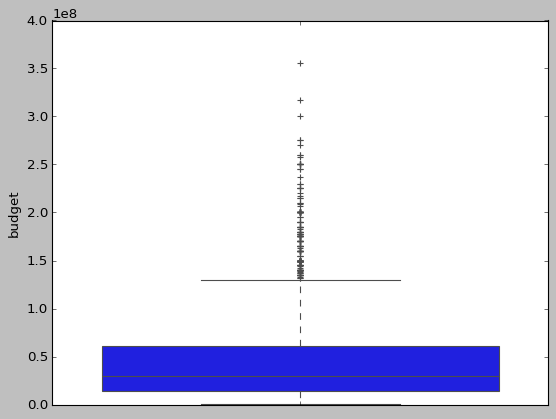

In [26]:
sns.boxplot(data=df['budget'])

<Axes: ylabel='worldwide'>

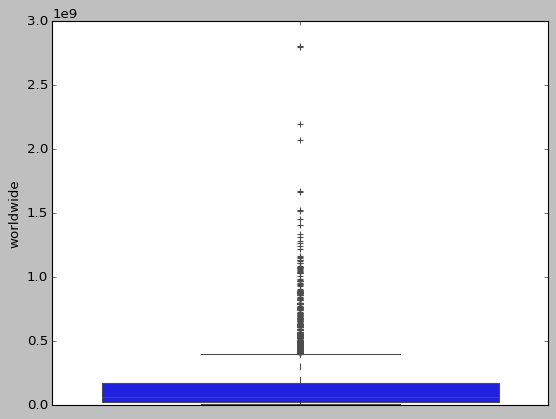

In [27]:
sns.boxplot(data=df['worldwide'])

Debido a que los outliers parecen ser proporcionales a simple vista y a que el nivel de correlación de las variables es alto, no eliminaremos los outliers.

In [91]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression , Ridge , Lasso, RidgeCV
from sklearn.neighbors import KNeighborsRegressor as KNN
from xgboost import XGBRegressor

Vamos a aplicar el algoritmo de Regresión Linear para verificar sí es el que más nos sirve para la predicción de estás variables

In [92]:
x=df[['budget']]
y=df[['worldwide']] #El y es lo que buscaremos predecir, es decir, buscaremos predecir que recaudación tendriamos sí asignamos un determinado presupuesto, x

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=16)

modelo = LinearRegression()
modelo.fit(x_train, y_train)


LinearRegression()

Aplicaremos varias métricas para evaluar este modelo:

In [106]:
y_pred = modelo.predict(x_test)
r2_rl = r2_score(y_test, y_pred)
print("r2", r2_rl)
mae = metrics.mean_absolute_error(y_test,y_pred)
print("MAE",mae)
mse = metrics.mean_squared_error(y_test,y_pred)
print("mse",mse)
rmse = np.sqrt(mse)
print("RMSE",rmse)

r2 0.53802539445335
MAE 86032409.07295147
mse 2.036887630277291e+16
RMSE 142719572.24842328


Como podemos ver en las métricas aplicadas, el mejor coeficiente lo la la r2 ya que determina que se capturan más de la mitad de los datos para evaluar la predicción. Sin embargo, el resto de las métricas sugieren que puede haber grandes errores a la hora de predecir. Esto se debe a la gran cantidad de outliers que tomamos en cuenta pero que son necesarios para poder tomar de muestra muchos más datos. Esto se debe a que el dataset no es bueno para predecir el problema que nos hemos planteado.

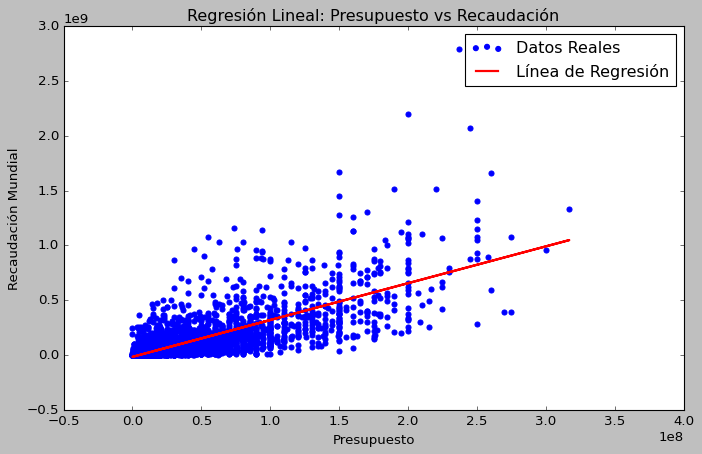

In [95]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Datos Reales')  
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')  
plt.title('Regresión Lineal: Presupuesto vs Recaudación')
plt.xlabel('Presupuesto')
plt.ylabel('Recaudación Mundial')
plt.legend()
plt.show()

Ahora vamos a aplicar el algoritmo KNN para ver sí es el más útil para la predicción

In [96]:
modelo2 = KNN(n_neighbors=10,weights="distance",metric="manhattan") #Se utiliza una clasificación a distancia porque se considera que las recaudaciones han crecido con los años, por lo tanto, hacerlo uniforme nos traerá menos predicción

In [97]:
modelo2.fit(x_train, y_train)


KNeighborsRegressor(metric='manhattan', n_neighbors=10, weights='distance')

In [107]:
y_pred = modelo2.predict(x_test)
r2_rl = r2_score(y_test, y_pred)
print("r2", r2_rl)
mae = metrics.mean_absolute_error(y_test,y_pred)
print("MAE",mae)
mse = metrics.mean_squared_error(y_test,y_pred)
print("mse",mse)
rmse = np.sqrt(mse)
print("RMSE",rmse)

r2 0.45626573658282965
MAE 89170663.26002555
mse 2.3973733231545148e+16
RMSE 154834535.00929677


Como observamos, el modelo KNN explica con menor precisión de ajuste de los datos que la Regresión Linear, ya que el rango de r2 sólo llega a 0.45. Además, empeoraron las métricas restantes analizadas.

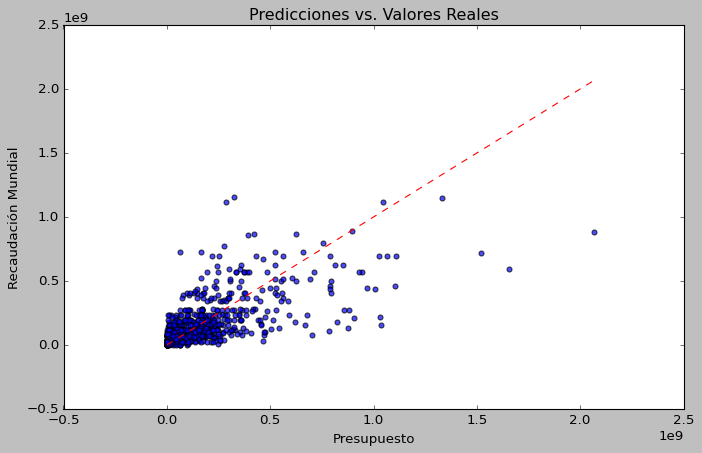

In [99]:
y_pred = modelo2.predict(x_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea de referencia
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Presupuesto')
plt.ylabel('Recaudación Mundial')
plt.show()


Como observamos en el gráfico, el modelo KNN nos muestra una regresión muy dispersa de los datos donde se predice que a mayor presupuesto de una producción hollywoodense, más incierto es predecir la recaudación, según los datos analizados. No es un buen modelo para predecir nuestra variable objetivo. 

Por último, probaremos el modelo XGBoost:

In [100]:
modelo3 = XGBRegressor(n_estimators= 2000 , max_depth= 5 , learning_rate = 0.01)
modelo3.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [108]:
y_pred = modelo3.predict(x_test)
r2_rl = r2_score(y_test, y_pred)
print("r2", r2_rl)
mae = metrics.mean_absolute_error(y_test,y_pred)
print("MAE",mae)
mse = metrics.mean_squared_error(y_test,y_pred)
print("mse",mse)
rmse = np.sqrt(mse)
print("RMSE",rmse)

r2 0.45699042081832886
MAE 87627822.27620761
mse 2.3941782552146628e+16
RMSE 154731323.7587872


Resumimos basandonos en la mejor métrica que podemos tomar para está predicción (r2):

In [103]:
print("Algoritmo Regresión Lineal " + str(round(r2_rl, 3)))
print("Algoritmo KNN " + str(round(r2_knn, 3)))
print("Algoritmo XGB " + str(round(r2_xgb, 3)))

Algoritmo Regresión Lineal 0.538
Algoritmo KNN 0.456
Algoritmo XGB 0.457


Conclusiones

Este dataset es muy problematico para tratar de aplicar algoritmos de predicción de MachineLearning. Tratamos de predecir cuánto recaudariamos sí tenemos determinado presupuesto. Esta base de datos no nos permite tener una cantidad de datos suficientes como para poder predecireso ya que depende de muchos factores problemáticos, como podemos ver en el incio del análisis con la diferencia que hay entre décadas, géneros cinemátograficos y factores contextuales como la pandemia del covid-19 que afecto la recaudación del 2020.

En todo caso, para mejorar estás predicciones deberiamos tener en cuenta la opinión del público, por ejemplo.Y con un dataset adjunto que podríamos analizar las preferencias deL público, podríamos tener mayor precisión en predecir nuestra variable objetivo.

Con este dataset, la mejor manera de predecir la recaudación es utilizando el modelo de Regresión Linear.